## Import Data ##

In [214]:
import pandas as pd
import numpy as np
from scipy.stats import *

data = pd.read_csv("smart_mobility_dataset.csv")
df = data

In [216]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [218]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [220]:
X = df.drop(columns=["Traffic_Condition"])
y = df["Traffic_Condition"]

In [222]:
df = df.drop(columns=["Timestamp"])
df = df.drop(columns=["Accident_Report"])

In [224]:
df

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,40.842275,-73.703149,205,49.893435,82.652780,2,0,-0.609199,2,45,450.760055,19.574337,0
1,40.831119,-73.987354,202,22.383965,45.829298,0,0,0.965442,16,1,321.800341,5.385554,0
2,40.819549,-73.732462,252,46.889699,82.772465,0,2,0.289660,16,49,231.152655,10.277477,0
3,40.725849,-73.980134,37,5.730536,37.695567,1,1,-0.271965,66,10,410.384292,29.243279,0
4,40.813265,-73.961631,64,61.348034,22.313358,1,3,-0.797606,3,5,364.466342,16.801459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40.604663,-73.831032,266,22.987611,12.670629,0,2,0.698929,87,28,252.070807,7.511153,0
4996,40.733790,-73.752213,20,75.736987,49.108556,0,3,0.742800,5,0,203.563872,6.681980,1
4997,40.821354,-73.759376,43,59.492981,78.719110,2,0,0.524574,94,16,71.660296,25.267246,2
4998,40.772343,-73.836698,88,25.901119,64.690719,2,2,-0.589902,73,5,442.692618,29.467326,2


## Data Clean Up ##

In [86]:
stats.zscore(df) #Find outliers

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,1.075669,1.673923,0.611612,0.358541,1.067390,1.198748,-1.360231,-1.033946,-1.702427,1.402995,1.372957,0.309549,-0.733605
1,0.946121,-1.623293,0.575691,-0.908852,-0.341171,-1.235259,-1.360231,1.663599,-1.210881,-1.625002,0.381519,-1.659049,-0.733605
2,0.811757,1.333845,1.174386,0.220156,1.071968,-1.235259,0.435691,0.505905,-1.210881,1.678267,-0.315378,-0.980328,-0.733605
3,-0.276336,-1.539530,-1.400003,-1.676095,-0.652300,-0.018255,-0.462270,-0.456224,0.544640,-1.005639,1.062549,1.651050,-0.733605
4,0.738783,-1.324861,-1.076707,0.886268,-1.240696,-0.018255,1.333652,-1.356709,-1.667316,-1.349730,0.709534,-0.075169,0.374895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.683608,0.190277,1.342020,-0.881041,-1.609546,-1.235259,0.435691,1.207030,1.281958,0.233087,-0.154560,-1.364136,-0.733605
4996,-0.184114,1.104702,-1.603559,1.549184,-0.215734,-1.235259,1.333652,1.282187,-1.597096,-1.693820,-0.527480,-1.479179,0.374895
4997,0.832716,1.021598,-1.328159,0.800804,0.916921,1.198748,-1.360231,0.908340,1.527731,-0.592730,-1.541550,1.099402,1.483394
4998,0.263579,0.124551,-0.789334,-0.746813,0.380311,1.198748,0.435691,-1.000889,0.790413,-1.349730,1.310935,1.682135,1.483394


In [165]:
#Drop outliers
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(5000, 13)

In [90]:
df.isna().sum()

Latitude                  0
Longitude                 0
Vehicle_Count             0
Traffic_Speed_kmh         0
Road_Occupancy_%          0
Traffic_Light_State       0
Weather_Condition         0
Sentiment_Score           0
Ride_Sharing_Demand       0
Parking_Availability      0
Emission_Levels_g_km      0
Energy_Consumption_L_h    0
Traffic_Condition         0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [92]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [226]:
X = df.drop(columns=["Traffic_Condition"])
y = df["Traffic_Condition"]
df

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,40.842275,-73.703149,205,49.893435,82.652780,2,0,-0.609199,2,45,450.760055,19.574337,0
1,40.831119,-73.987354,202,22.383965,45.829298,0,0,0.965442,16,1,321.800341,5.385554,0
2,40.819549,-73.732462,252,46.889699,82.772465,0,2,0.289660,16,49,231.152655,10.277477,0
3,40.725849,-73.980134,37,5.730536,37.695567,1,1,-0.271965,66,10,410.384292,29.243279,0
4,40.813265,-73.961631,64,61.348034,22.313358,1,3,-0.797606,3,5,364.466342,16.801459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40.604663,-73.831032,266,22.987611,12.670629,0,2,0.698929,87,28,252.070807,7.511153,0
4996,40.733790,-73.752213,20,75.736987,49.108556,0,3,0.742800,5,0,203.563872,6.681980,1
4997,40.821354,-73.759376,43,59.492981,78.719110,2,0,0.524574,94,16,71.660296,25.267246,2
4998,40.772343,-73.836698,88,25.901119,64.690719,2,2,-0.589902,73,5,442.692618,29.467326,2


## Statistical Modeling ##

In [96]:
df.describe()

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,40.749645,-73.847433,153.921200,42.111096,54.748397,1.015000,1.514800,-0.005652,50.487800,24.613000,272.174927,17.343243,0.66180
std,0.086123,0.086204,83.523342,21.707720,26.145238,0.821773,1.113746,0.583790,28.484426,14.532511,130.086372,7.208277,0.90221
min,40.600016,-73.999987,10.000000,5.002789,10.005031,0.000000,0.000000,-0.999819,1.000000,0.000000,50.136855,5.003787,0.00000
25%,40.675403,-73.920281,80.000000,23.195752,32.089653,0.000000,1.000000,-0.500154,26.000000,12.000000,160.564433,11.098761,0.00000
50%,40.748875,-73.846058,156.000000,42.191599,54.657297,1.000000,2.000000,-0.010564,50.000000,24.000000,272.045513,17.153791,0.00000
75%,40.824735,-73.771685,226.000000,60.751760,77.581720,2.000000,3.000000,0.500518,75.000000,37.000000,382.242055,23.516595,2.00000
max,40.899972,-73.700159,299.000000,79.997556,99.999729,2.000000,3.000000,0.999354,99.000000,49.000000,499.922663,29.995416,2.00000


In [98]:
df.corr()

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
Latitude,1.000000,-0.003971,0.007470,0.005284,0.011346,-0.001061,-0.010300,0.001996,0.000400,0.006585,0.008914,-0.021324,0.003598
Longitude,-0.003971,1.000000,0.014853,-0.012327,0.011606,0.011217,-0.022484,-0.014923,0.007059,0.008788,0.010227,0.030253,0.005222
Vehicle_Count,0.007470,0.014853,1.000000,-0.003474,0.031420,-0.007406,0.008416,-0.001953,-0.009880,0.003478,0.006750,-0.019133,-0.384447
Traffic_Speed_kmh,0.005284,-0.012327,-0.003474,1.000000,-0.012365,-0.000979,0.031497,0.010456,-0.018285,-0.010029,-0.006471,-0.013124,0.209415
Road_Occupancy_%,0.011346,0.011606,0.031420,-0.012365,1.000000,-0.010269,0.004495,0.014893,-0.004037,-0.023494,0.003363,0.005441,-0.241740
Traffic_Light_State,-0.001061,0.011217,-0.007406,-0.000979,-0.010269,1.000000,0.004457,-0.028282,0.013446,0.022278,-0.009035,-0.002694,-0.009884
Weather_Condition,-0.010300,-0.022484,0.008416,0.031497,0.004495,0.004457,1.000000,-0.002470,-0.008321,-0.007822,0.003690,0.020609,-0.016419
Sentiment_Score,0.001996,-0.014923,-0.001953,0.010456,0.014893,-0.028282,-0.002470,1.000000,0.004813,-0.012311,-0.015449,0.007166,-0.011945
Ride_Sharing_Demand,0.000400,0.007059,-0.009880,-0.018285,-0.004037,0.013446,-0.008321,0.004813,1.000000,0.000792,-0.001670,0.012391,-0.013802
Parking_Availability,0.006585,0.008788,0.003478,-0.010029,-0.023494,0.022278,-0.007822,-0.012311,0.000792,1.000000,0.013500,-0.010631,0.006447


In [100]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.26841846e-110,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

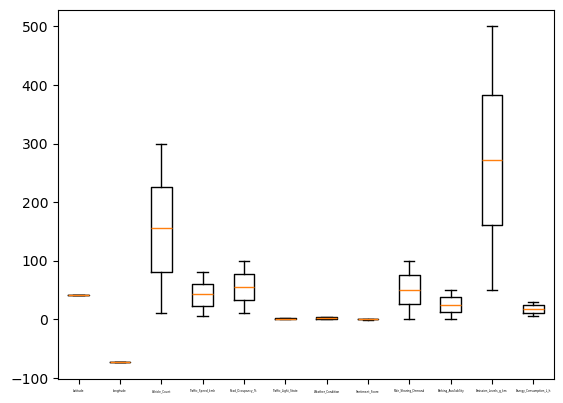

In [102]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=2)
plt.show()

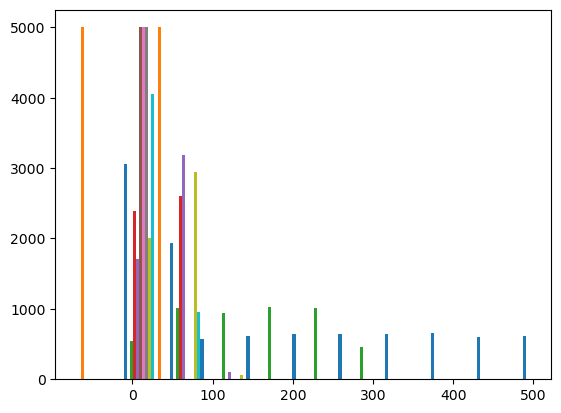

In [104]:
plt.hist(X)
plt.show()

## Fine-Tuning ##

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.1293   | 8.116     | 19.06     | 15.18     |
| 2         | -0.1367   | 12.37     | 3.964     | 4.808     |
| 3         | -0.3461   | 2.104     | 17.46     | 12.82     |
| 4         | -0.1402   | 14.45     | 1.391     | 19.46     |
| 5         | -0.1348   | 16.82     | 5.034     | 5.273     |
| 6         | -0.1679   | 4.485     | 6.781     | 11.45     |
| 7         | -0.1375   | 15.24     | 3.582     | 3.199     |
| 8         | -0.1297   | 12.86     | 19.67     | 17.1      |
| 9         | -0.1297   | 13.64     | 19.91     | 10.41     |
| 10        | -0.1309   | 13.49     | 13.44     | 14.34     |
| 11        | -0.131    | 18.65     | 13.6      | 7.987     |
| 12        | -0.1333   | 19.8      | 8.044     | 14.43     |
| 13        | -0.1298   | 19.7      | 16.84     | 14.6      |
| 14        | -0.1297   | 19.42     | 19.62     | 2.212     |
| 15    

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = DecisionTreeRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=42,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.1416   | 8.116     | 19.06     | 15.18     |
| 2         | -0.1963   | 12.37     | 3.964     | 4.808     |
| 3         | -0.4228   | 2.104     | 17.46     | 12.82     |
| 4         | -0.1807   | 14.45     | 1.391     | 19.46     |
| 5         | -0.1826   | 16.82     | 5.034     | 5.273     |
| 6         | -0.1671   | 4.485     | 6.781     | 11.45     |
| 7         | -0.1418   | 8.048     | 18.14     | 16.52     |
| 8         | -0.1471   | 12.42     | 19.51     | 16.99     |
| 9         | -0.158    | 12.21     | 14.6      | 13.62     |
| 10        | -0.1471   | 13.63     | 19.87     | 10.92     |
| 11        | -0.1512   | 19.86     | 16.7      | 13.18     |
| 12        | -0.1512   | 18.77     | 16.44     | 6.208     |
| 13        | -0.1604   | 17.53     | 13.25     | 19.95     |
| 14        | -0.1687   | 19.83     | 8.966     | 12.9      |
| 15    

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=100, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 100 folds for each of 28 candidates, totalling 2800 fits
{'n_neighbors': 10}


## Training and Testing ##

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

#model1 = RandomForestClassifier(max_depth = 7, min_samples_leaf = 17, min_samples_split = 19).fit(X_train, y_train)
model1 = RandomForestClassifier(n_estimators = 100, random_state=42).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model1, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.9566666666666667


In [230]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 18, min_samples_split = 2).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model2, "Traffic.joblib")
    model = joblib.load("Traffic.joblib")

Accuracy: 0.9573333333333334


In [175]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

score = model3.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model3, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.8146666666666667


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

linreg = LinearRegression()

param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

model4 = GridSearchCV(linreg, param_space, cv=100).fit(X_train, y_train)

predictions = np.array(model4.predict(X_test))
score = model4.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.22679358500275215


In [204]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
import joblib


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
model5 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3).fit(X_train, y_train)

predictions = model5.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model5, ".joblib")
    model = joblib.load(".joblib")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

## Predicted vs Actual ##

In [206]:
y_predicted = model.predict(X_test)

In [208]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[874,  13,  80],
       [  4,  83,   7],
       [ 58,  15, 366]])

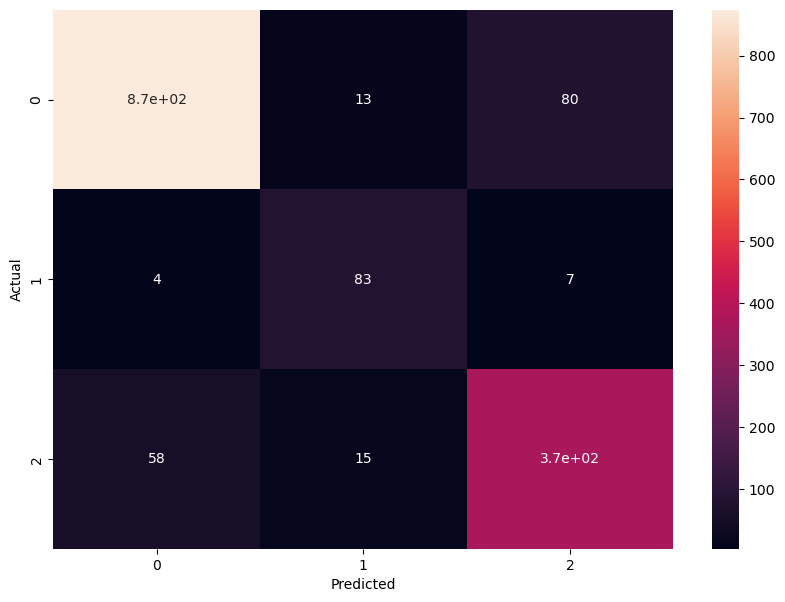

In [250]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [232]:
prob1 = model.predict_proba(X)[:, 1] #Probability of A doing y (1) in the future
prob1

array([0., 0., 0., ..., 0., 0., 0.])

In [248]:
prob2 = model.predict_proba(X[:len(df)]) #Probability of A doing y (0 or 1) in the future
prob2

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       ...,
       [0.06477733, 0.        , 0.93522267],
       [0.06477733, 0.        , 0.93522267],
       [0.04807692, 0.        , 0.95192308]])

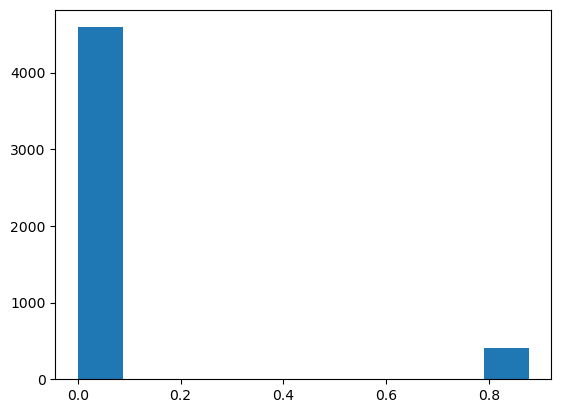

In [240]:
plt.hist(prob1)
plt.show()

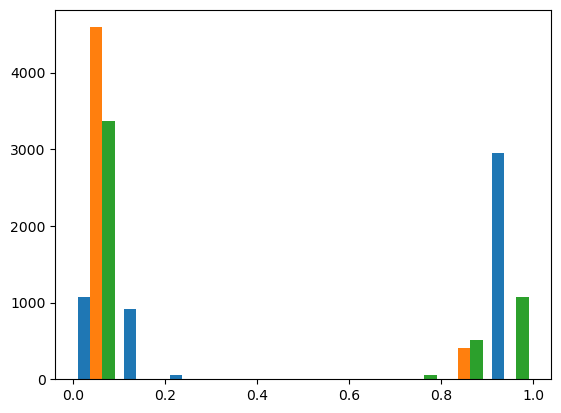

In [242]:
plt.hist(prob2)
plt.show()

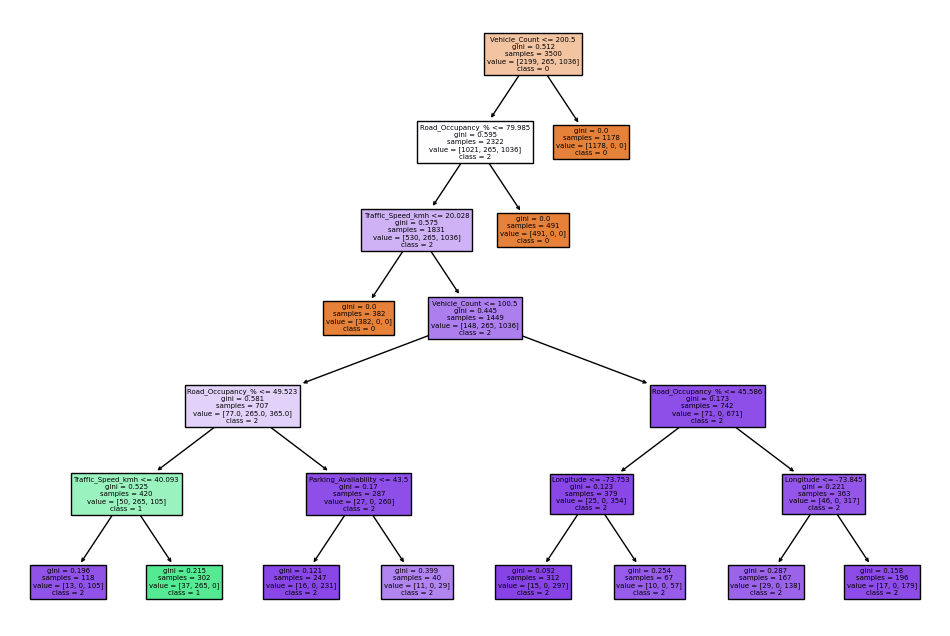

In [338]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=model.feature_names_in_, class_names=[str(label) for label in df["Traffic_Condition"].unique()], filled=True)
plt.show()